<a href="https://colab.research.google.com/github/avocadopelvis/cubic-zirconia/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings("ignore")

In [3]:
# load data
df = pd.read_csv("/content/drive/MyDrive/gemstone-price-prediction/cubic_zirconia.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [11]:
# since the first column (Unnamed: 0) is an index, we can remove it
df = df.drop("Unnamed: 0", axis = 1)

### Exploratory Data Analysis (EDA)

In [12]:
# check the shape of the dataset
df.shape

(26967, 10)

In [13]:
# get the non-null count & the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


#### As observed above, there are 3 categorical variables and the rest are numerical variables.

### Explore Numerical Variables

In [14]:
# get the summary statistics of the numerical variables
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


#### As observed above, the minimum value of x, y, z are zero. This is not possible since we cannot have dimensionless or 2-D diamonds.

In [17]:
# check for the values which are equal to zero
print(f"Number of rows with x == 0: {(df.x == 0).sum()}")
print(f"Number of rows with y == 0: {(df.y == 0).sum()}")
print(f"Number of rows with z == 0: {(df.z == 0).sum()}")
# print(f"Number of rows with depth == 0: {(df.depth == 0).sum()}")

Number of rows with x == 0: 3
Number of rows with y == 0: 3
Number of rows with z == 0: 9


In [22]:
# since it is not possible to have dimensionless or 2-D diamonds, we drop these rows
drop = ["x", "y", "z"]
for i in drop:
  df = df.drop(df[df[i] == 0].index)

In [20]:
df.shape

(26958, 10)

In [25]:
# check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")

Number of duplicates: 33


In [28]:
# drop duplicates
df.drop_duplicates(inplace = True)
df.shape

(26925, 10)

In [34]:
# check for missing values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

#### As observed above, depth has 697 missing values.

In [32]:
# replace the missing values with mean/median
df = df.fillna(df.median())

In [36]:
df.shape

(26925, 10)

In [37]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

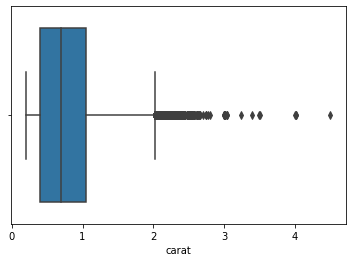

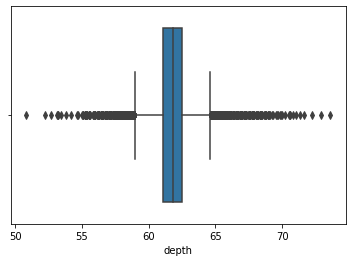

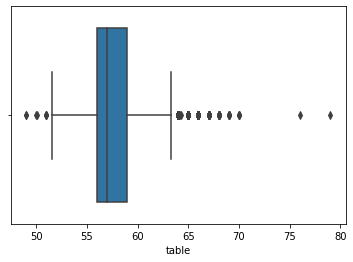

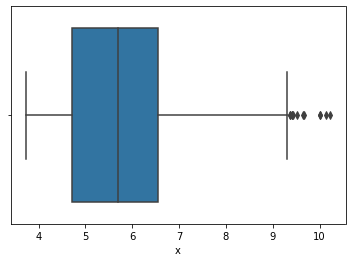

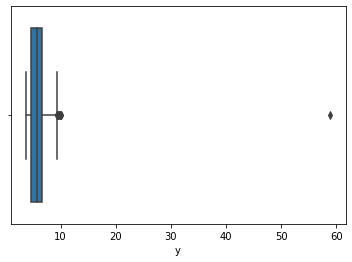

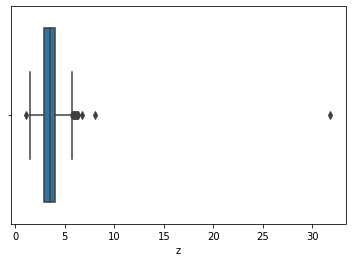

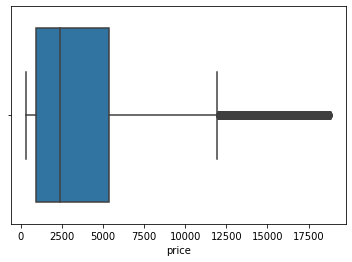

In [41]:
# check for outliers
cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
for i in cols:
  sns.boxplot(df[i], whis = 1.5)
  plt.show()

#### Since there is a significant amount of outliers present in some variables, we need to remove them.

In [45]:
# function to remove outlier
def remove_outlier(col):
  sorted(col)
  Q1, Q3 = np.percentile(col, [25, 75])
  IQR = Q3-Q1
  lower = Q1-(1.5*IQR)
  upper = Q3+(1.5*IQR)
  return lower, upper

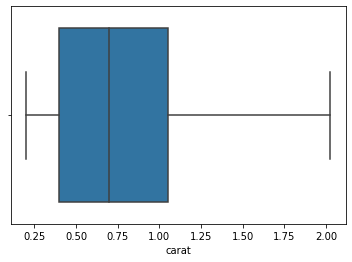

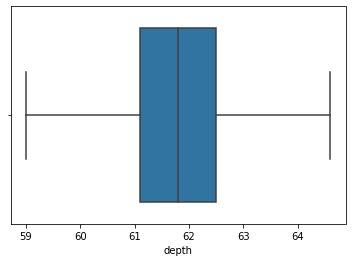

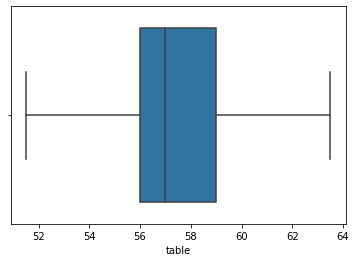

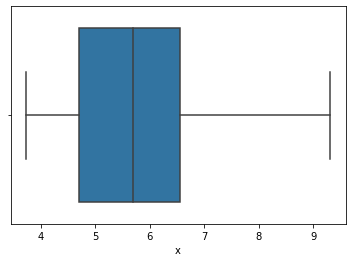

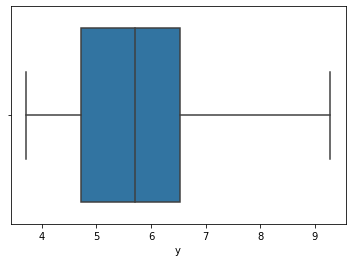

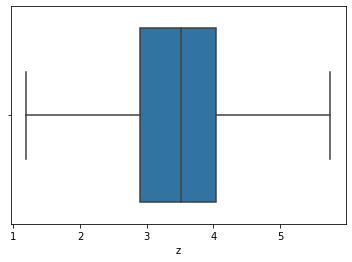

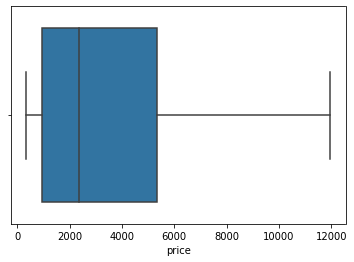

In [46]:
for i in cols:
  lower, upper = remove_outlier(df[i])
  df[i] = np.where(df[i]>upper, upper, df[i])
  df[i] = np.where(df[i]<lower, lower, df[i])

for i in cols:
  sns.boxplot(df[i], whis = 1.5)
  plt.show()

### Explore Categorical Variables

In [52]:
# get the summary statistics of the categorical variables
df.describe(include = ["object"])

,cut,color,clarity
count,26925,26925,26925
unique,5,7,8
top,Ideal,G,SI1
freq,10805,5650,6564


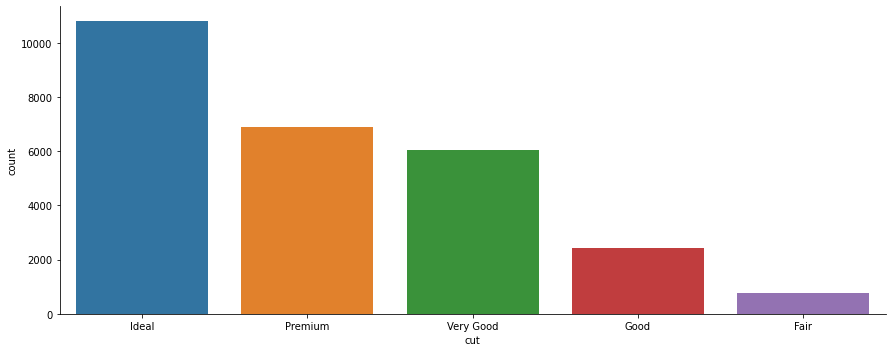

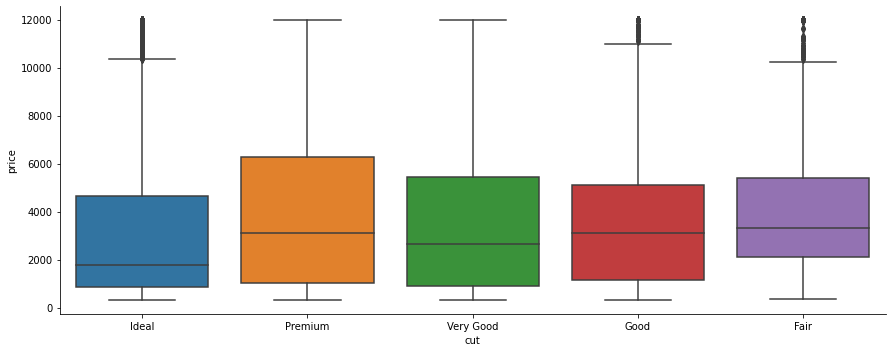

In [49]:
# plot for "cut"
sns.catplot("cut", data = df, kind = "count", aspect = 2.5)
sns.catplot(x = "cut", y = "price", kind = "box", data = df, aspect = 2.5)

#### Ideal cut has the highest count with Premium cut being the most expensive

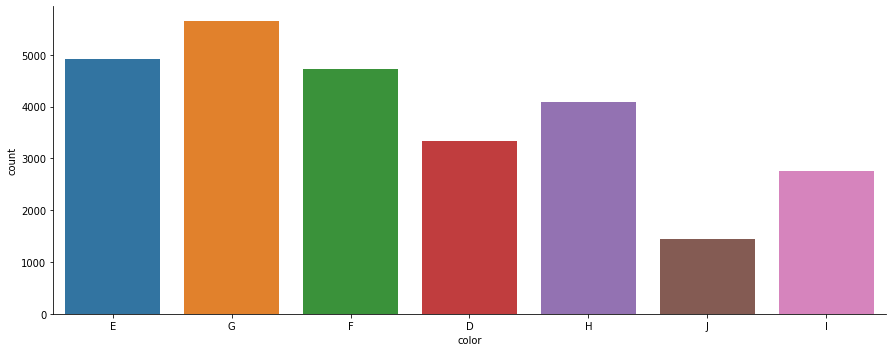

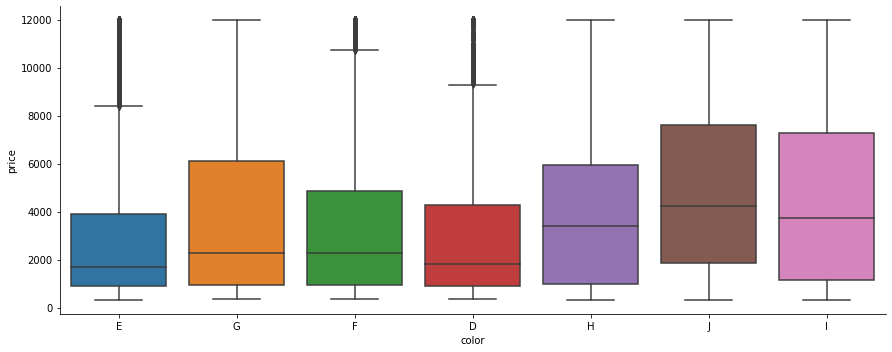

In [50]:
# plot for "color"
sns.catplot("color", data = df, kind = "count", aspect = 2.5)
sns.catplot(x = "color", y = "price", kind = "box", data = df, aspect = 2.5)

#### G has the highest count with J being the most expensive.

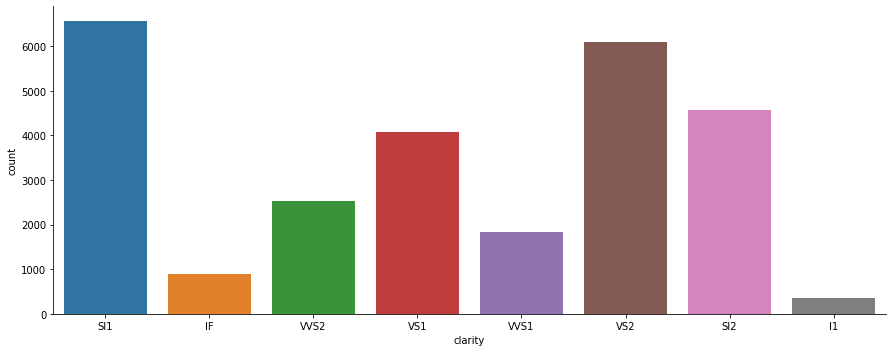

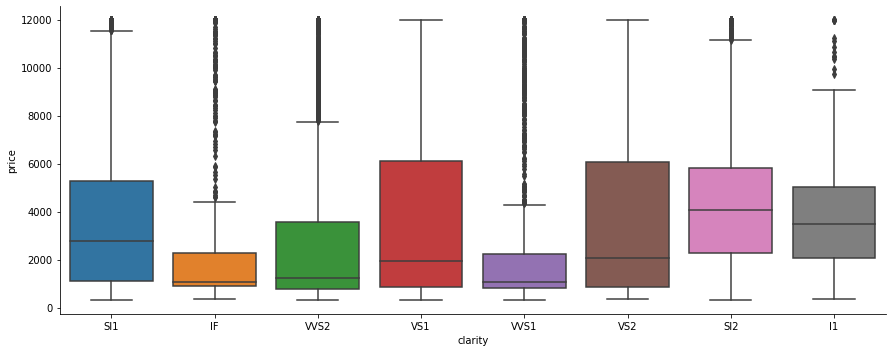

In [51]:
# plot for "clarity"
sns.catplot("clarity", data = df, kind = "count", aspect = 2.5)
sns.catplot(x = "clarity", y = "price", kind = "box", data = df, aspect = 2.5)

#### SI1 clarity has the highest count with VS1 & VS2 being the most expensive.

### Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78e8be7050>,
      dtype=object)

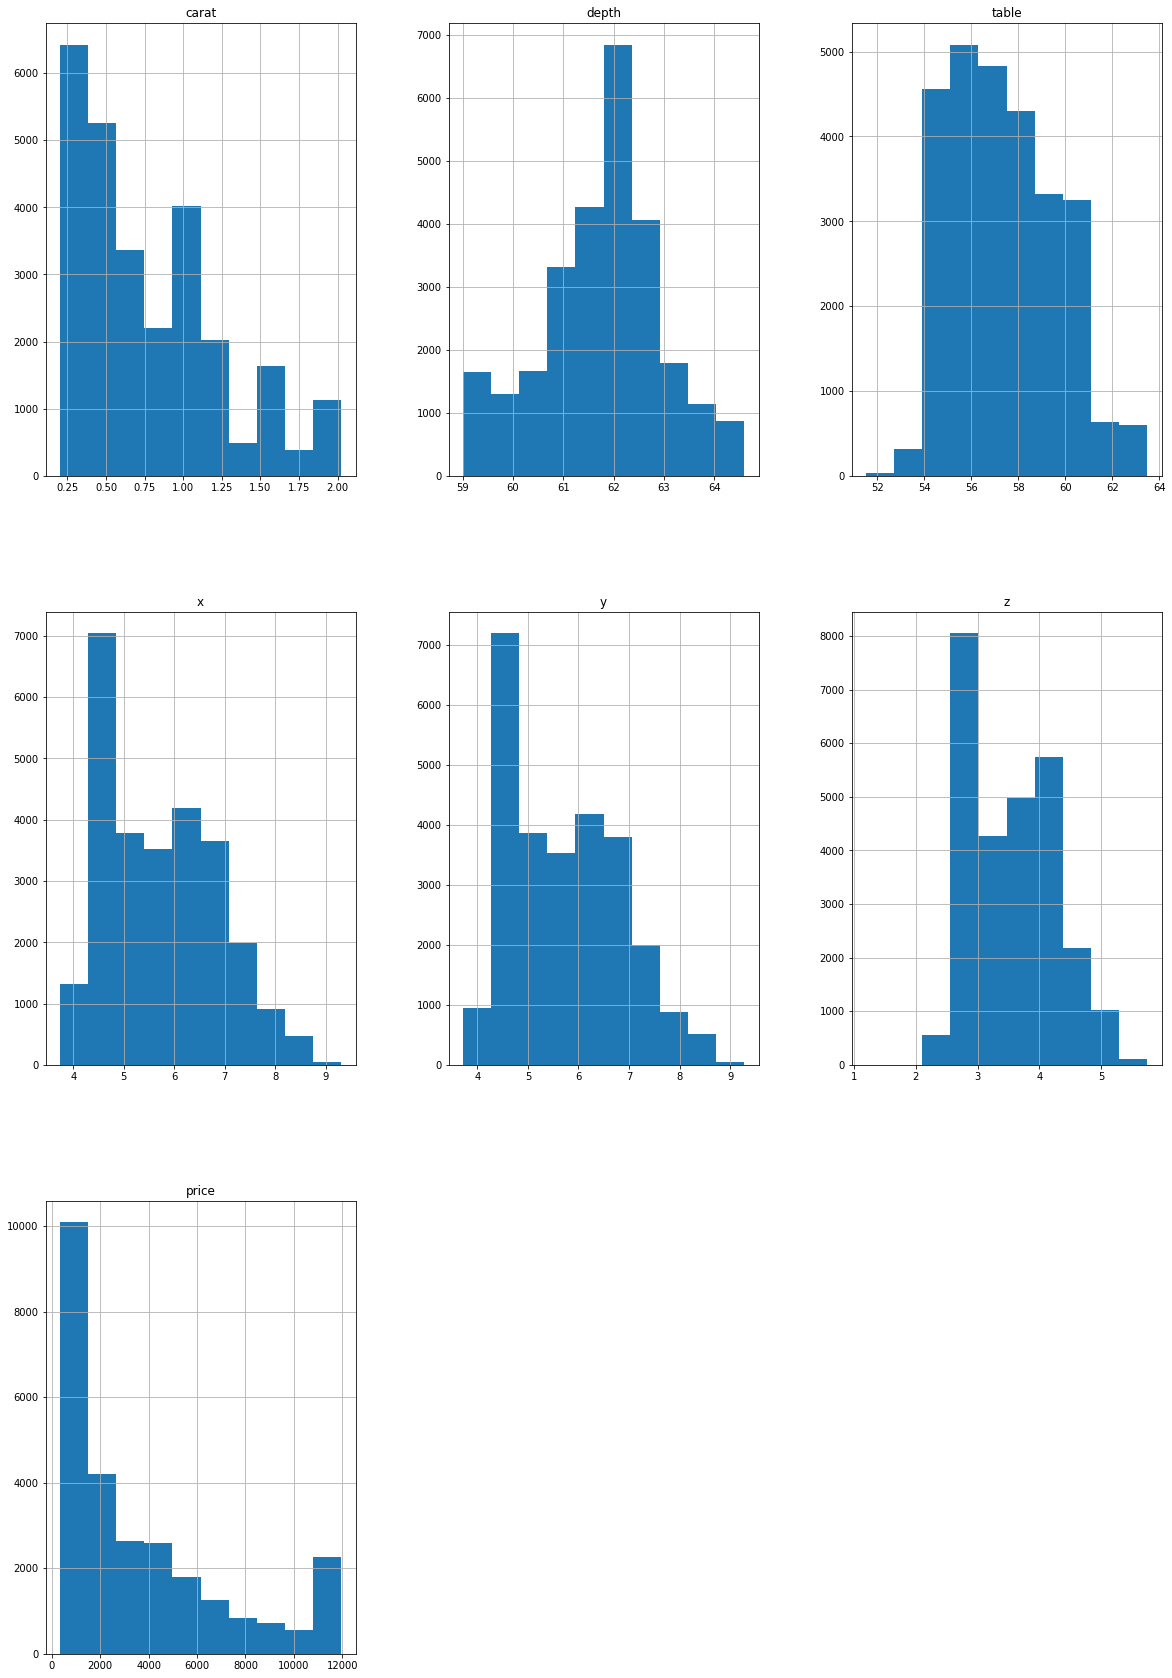

In [47]:
df.hist(figsize = (20, 30))

In [48]:
# measure the skewness of each attribute
df.skew()

carat    0.917214
depth   -0.194474
table    0.480476
x        0.397696
y        0.394060
z        0.394819
price    1.157121
dtype: float64

#### As observed above, the distribution of quantitative features such as: carat & price are heavily right skewed

### Multivariate Analysis

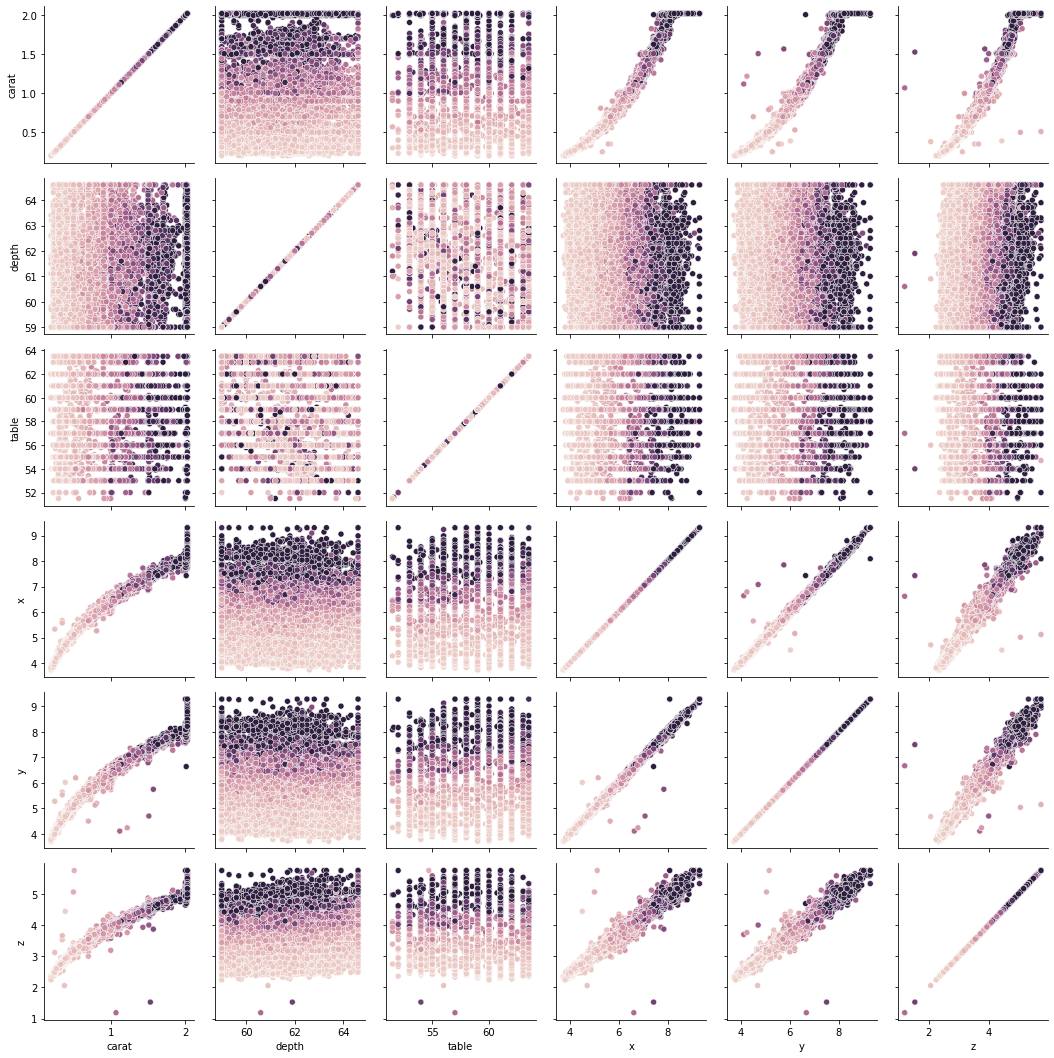

In [71]:
# sns.pairplot(data = df, hue = "price")
g = sns.PairGrid(data = df, hue = "price")
g.map(sns.scatterplot)

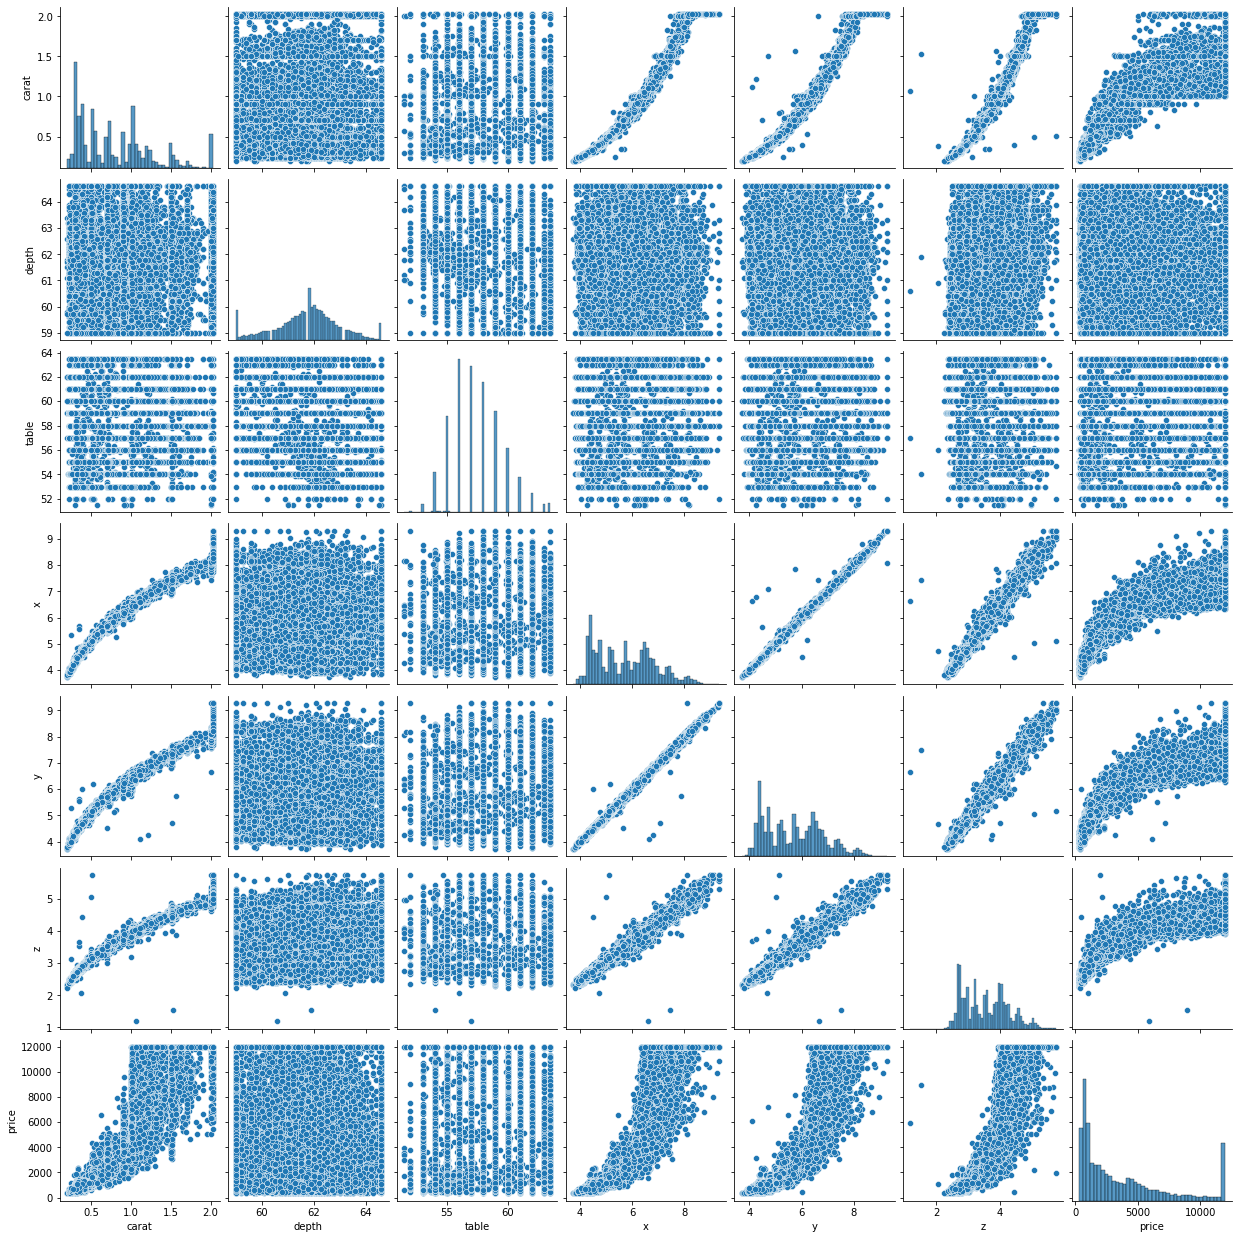

In [72]:
sns.pairplot(data = df)

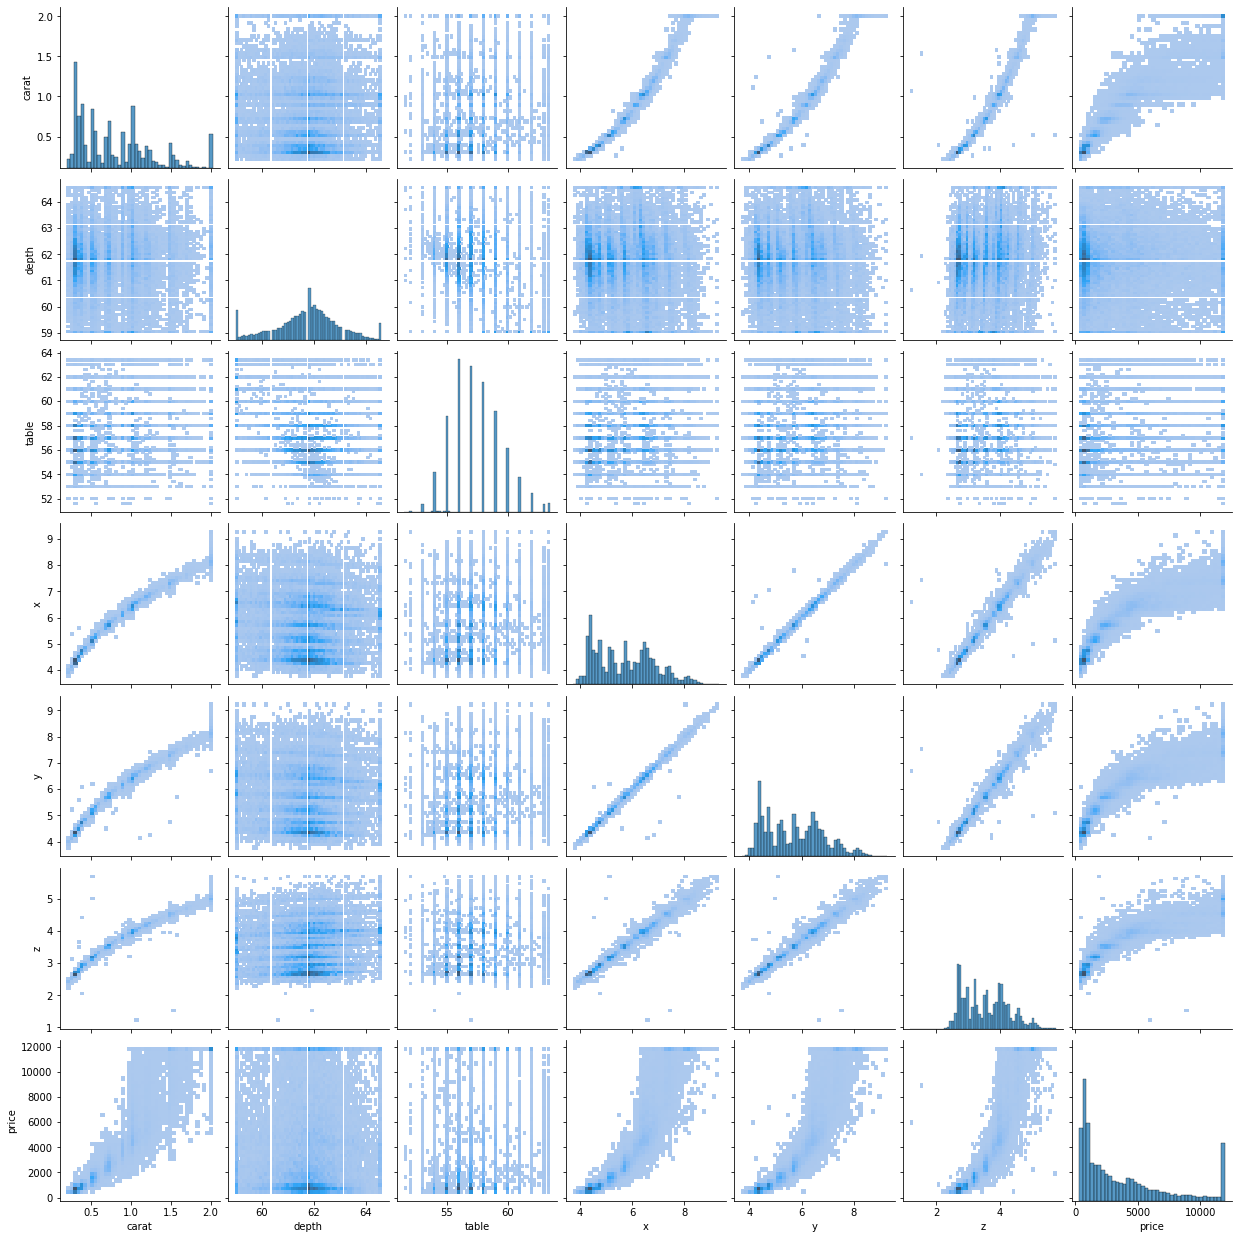

In [74]:
sns.pairplot(df, kind="hist")